In [1]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [2]:
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['p-n ratio_categorize']=np.digitize(df['p-n ratio'], [0,5])
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio,p-n ratio_categorize
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,0,0,0,0,0,0,0,0,37.296795,2
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,0,0,0,0,0,0,0,0,5.241706,2
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,8.582915,2
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,0,0,0,0,0,0,0,0,4.767790,1
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,0,0,0,0,0,0,0,0,18.229167,2


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 좋음)')

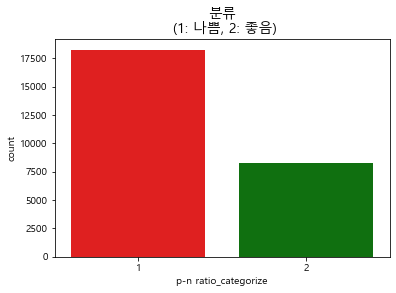

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red','green']
sns.countplot('p-n ratio_categorize', data=df, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 좋음)", fontsize=14)

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X=df[df.columns[:-2]]
y=df['p-n ratio_categorize']

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=df.columns[:-2])
y_samp=pd.DataFrame(data=y_sample, columns=['p-n ratio_categorize'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [5]:
df2['p-n ratio_categorize'].value_counts()

1    8284
2    8284
Name: p-n ratio_categorize, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 좋음)')

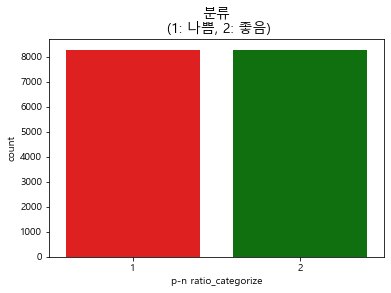

In [6]:
sns.countplot('p-n ratio_categorize', data=df2, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 좋음)", fontsize=14)

In [7]:
X=df2[df2.columns[:-1]]
y=df2['p-n ratio_categorize']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential() # 모델 구성
# 노드 개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(patience=2) # 학습 조기 종료 옵션. 2회 이상 개선되지 않으면 학습 종료
# validation 데이터가 필요함
hist=model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])
# validation_split : Train 중에서 validation 데이터의 비율

Epoch 1/100
332/332 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4984 - val_loss: 0.0000e+00 - val_accuracy: 0.5074
Epoch 2/100
332/332 [==============================] - 0s 904us/step - loss: 0.0000e+00 - accuracy: 0.4955 - val_loss: 0.0000e+00 - val_accuracy: 0.5074
Epoch 3/100
332/332 [==============================] - 0s 902us/step - loss: 0.0000e+00 - accuracy: 0.5105 - val_loss: 0.0000e+00 - val_accuracy: 0.5074


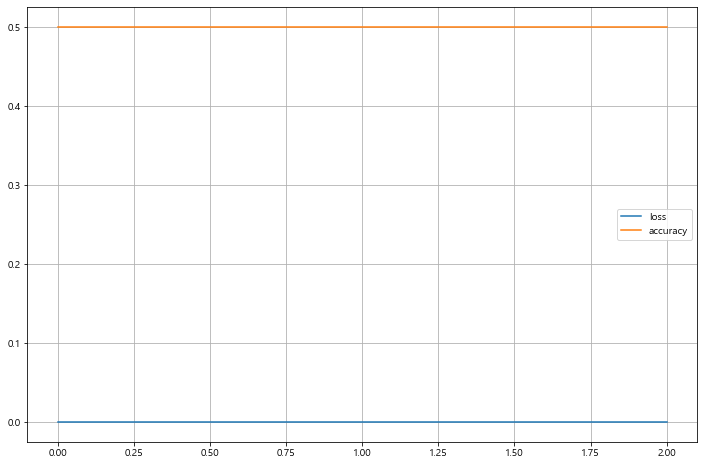

In [11]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [12]:
# 모델 평가 
scores=model.evaluate(X_train, y_train, verbose=1)
print(scores)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100)) # 학습용

scores=model.evaluate(X_test, y_test, verbose=1)
print(scores)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100)) # 검증용

415/415 [==============================] - 0s 502us/step - loss: 0.0000e+00 - accuracy: 0.5021
[0.0, 0.5021125674247742]
accuracy : 50.21%
104/104 [==============================] - 0s 467us/step - loss: 0.0000e+00 - accuracy: 0.4916
[0.0, 0.4915509819984436]
accuracy : 49.16%
